In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os


### 1. Carga de datos


In [2]:
PATH = os.path.join(os.path.dirname(os.path.abspath('')), 'data', 'titanic', 'train.csv')

### 2. Información básica

In [3]:
# Lectura de datos
df = pd.read_csv(PATH)

# Visión general de los datos
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras 5 filas:")
display(df.head())


Dimensiones del dataset: (891, 12)

Primeras 5 filas:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3: Análisis de valores nulos


In [4]:
print("Valores nulos por columna:")
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({
    'Valores Nulos': missing_values,
    'Porcentaje': missing_percentages
})
display(missing_data)

Valores nulos por columna:


,Valores Nulos,Porcentaje
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


### 4. Visualizaciones básicas

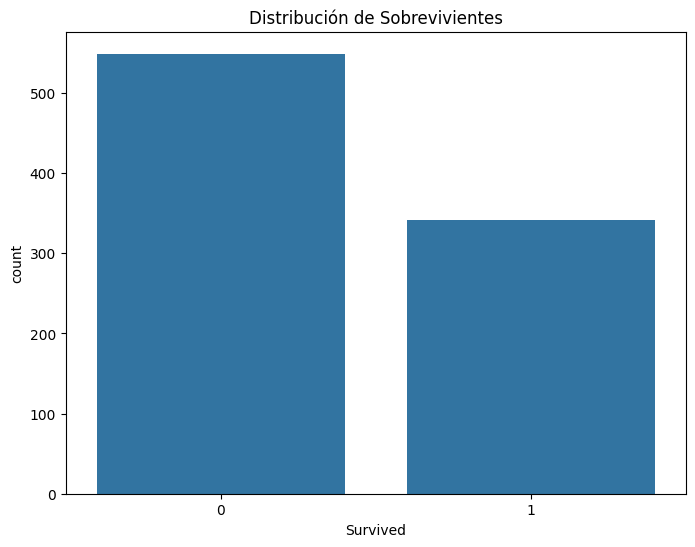

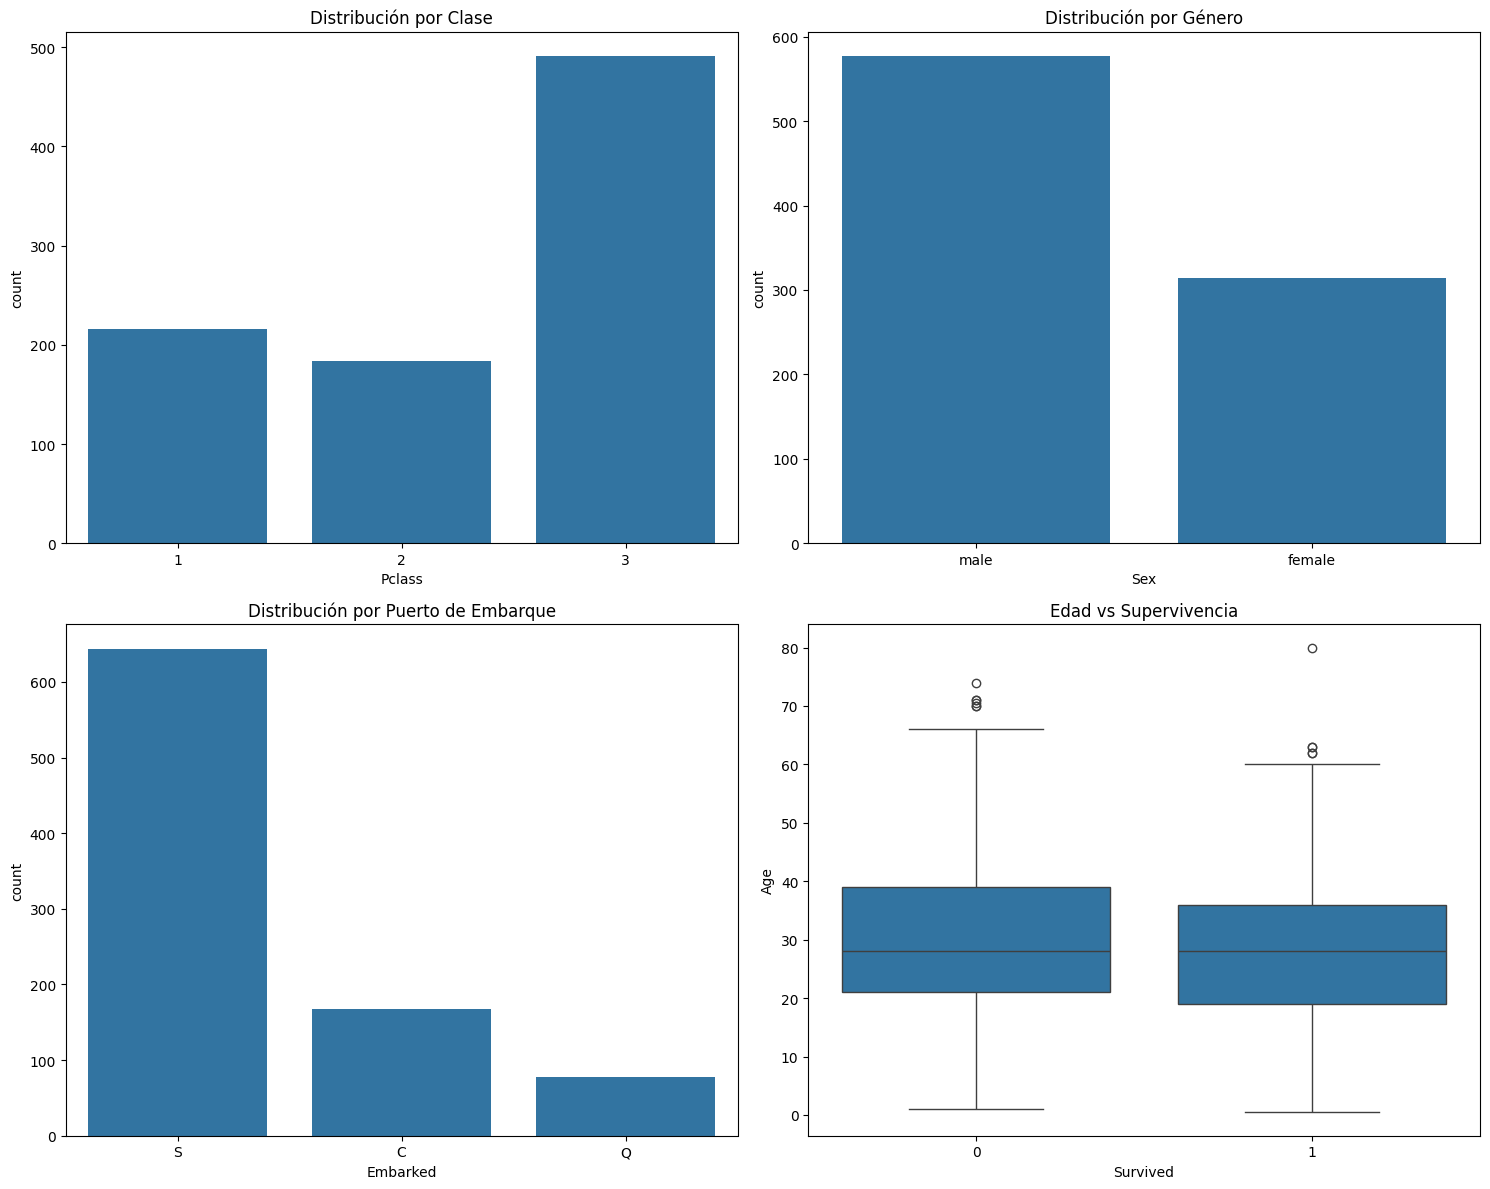

In [5]:
# Distribución de la variable objetivo
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Survived')
plt.title('Distribución de Sobrevivientes')
plt.show()

# Análisis de variables categóricas
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
sns.countplot(data=df, x='Pclass', ax=axes[0,0])
axes[0,0].set_title('Distribución por Clase')

sns.countplot(data=df, x='Sex', ax=axes[0,1])
axes[0,1].set_title('Distribución por Género')

sns.countplot(data=df, x='Embarked', ax=axes[1,0])
axes[1,0].set_title('Distribución por Puerto de Embarque')

sns.boxplot(data=df, x='Survived', y='Age', ax=axes[1,1])
axes[1,1].set_title('Edad vs Supervivencia')
plt.tight_layout()
plt.show()

### 5. Correlaciones

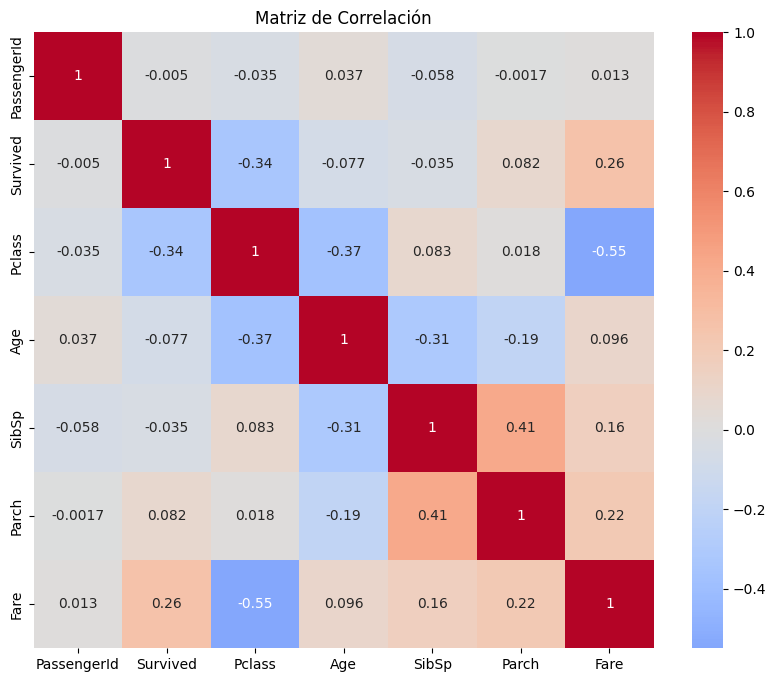

In [6]:
# Análisis de correlaciones
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

### 6. Resumen de hallazgos

In [7]:
# Resumen de hallazgos principales
print("Hallazgos principales del análisis exploratorio:")
print("1. Valores nulos:")
for column in df.columns[df.isnull().any()]:
    print(f"   - {column}: {df[column].isnull().sum()} valores nulos ({(df[column].isnull().sum()/len(df)*100):.2f}%)")

print("\n2. Estadísticas de supervivencia:")
print(f"   - Tasa de supervivencia general: {(df['Survived'].mean()*100):.2f}%")
print(f"   - Supervivencia por género:")
print(df.groupby('Sex')['Survived'].mean().round(3))

print("\n3. Distribución por clase:")
print(df['Pclass'].value_counts(normalize=True).round(3))

Hallazgos principales del análisis exploratorio:
1. Valores nulos:
   - Age: 177 valores nulos (19.87%)
   - Cabin: 687 valores nulos (77.10%)
   - Embarked: 2 valores nulos (0.22%)

2. Estadísticas de supervivencia:
   - Tasa de supervivencia general: 38.38%
   - Supervivencia por género:
Sex
female    0.742
male      0.189
Name: Survived, dtype: float64

3. Distribución por clase:
Pclass
3    0.551
1    0.242
2    0.207
Name: proportion, dtype: float64
